In [1]:
!pip install opencv-python opencv-contrib-python

In [ ]:
import cv2 
# OpenCV : Open Source Computer Vision
# 이미지/영상 처리에 사용할 수 있는 라이브러리

In [3]:
import cv2 

#이미지 불러오기
img = cv2.imread("./images/7.png", cv2.IMREAD_COLOR)

cv2.imshow('otter', img)
cv2.waitKey(0) # 1000: 1초
cv2.destroyAllWindows()

- imread(파일명, 이미지 형식) : 이미지 파일을 읽기위한 코드
- waitKey() : 키보드 입력을 기다리는 시간 설정 (0: 무한히 기다리겠다)
- destroyAllWindows() : 생성된 모든 창을 종료

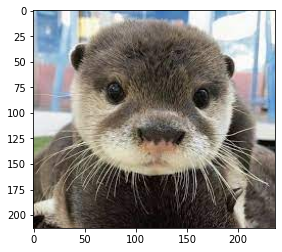

In [7]:
import cv2
import matplotlib.pyplot as plt

# matplotlib, opencv 색상공간이 다르기 때문에 이미지 색상 달라짐
img = cv2.imread("./images/7.png", cv2.IMREAD_COLOR)

# 색상공간 변환(RGB -> BGR)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.imshow(img)

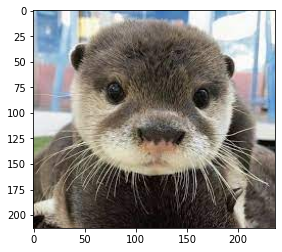

In [10]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/7.png", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img)  # img 색상 b,g,r로 분리
img2 = cv2.merge([r,g,b])  # b와 r의 순서를 바꿔서 Merge

plt.imshow(img2)

### 1. 흑백(Gray) 이미지 로딩

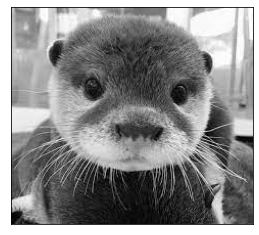

In [2]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/7.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
plt.xticks([])  # 축 없애기
plt.yticks([])
plt.show()

### 2. 이진 (Binary) 이미지 만들기
- 픽셀값 0~255

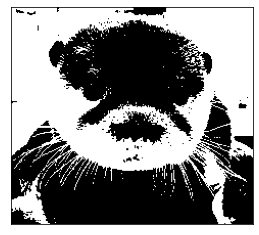

In [7]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/7.png", cv2.IMREAD_GRAYSCALE)

# threshold : 한계점
ret, thr1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thr1, cmap='gray')
plt.xticks([])  # 축 없애기
plt.yticks([])
plt.show()

- cv2.threshold(img, threshold_value, value, flag)
    - threshold_value : 픽셀 경계값(0과 255로 나누기 위한 기준)
    - value : 경계값 보다 클때 적용되는 값
    - flag : 적용 방법
        - cv2.THRESH_BINARY : 픽셀값이 경계값보다 크면 value, 아니면 0을 할당
        - cv2.THRESH_BINARY_INV : 픽셀값이 경계값보다 크면 0, 아니면 value 할당
        - cv2.THRESH_TRUNC : 필셀값이 경계값보다 크면 경계값, 아니면 픽셀값 그대로 할당
        - cv2.THRESH_TOZERO : 픽셀값이 문턱값보다 크면 픽셀값, 아니면 0을 할당
        - cv2.THRESH_TOZERO_INV : 픽셀값이 문턱값보다 크면 0, 아니면 픽셀값을 할당

### 3. 이미지 픽셀 값 다루기

In [11]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/7.png", cv2.IMREAD_COLOR)
print(img[200,100])

[ 8  8 14]


img[200,100] : 픽셀의 좌표
Blue(8), Green(8), Red(14) 순으로 출력

In [14]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/7.png", cv2.IMREAD_COLOR)

for i in range(50):
    img[200,i] = [0,0,0]

cv2.imshow('otter', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### 3.1 이미지 속성출력

In [20]:
print(img.shape)  # 이미지 크기
print(img.size)  
print(img.dtype)

(213, 237, 3)
151443
uint8


### 4. ROI (Region of Image) 설정 (이미지 자르기)

In [4]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/7.png", cv2.IMREAD_COLOR)

subimg = img[20:150,50:190]

cv2.imshow('otter', img)
cv2.imshow('cuttion', subimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 5. 도형 그리기

In [9]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("./images/7.png", cv2.IMREAD_COLOR)
#img = cv2.rectangle(img, (10,10),(50,300),(255,0,0),3) 
# 사각형의 (좌상), (우하) 좌표,(b,g,r), 선두께

font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img, 'ROI Region', (10,50), font, 1,(255,0,0),4) 
                                    # x축,y축
cv2.imshow('otter', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

- cv2.line(배경이미지, 시작점좌표, 끝점좌표, 색상, 선두께) : 직선 그리기 함수
- cv2.circle(배경이미지, 중심좌표, 반지름, 색상, 선두께) : 원 그리기 함수
- cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께) : 사각형 그리기 함수
- cv2.ellipse(배경이미지, 중심좌표, 장축/단축길이, 호의시작각, 호의 종료각, 색상, 선두께) : 타원 그리기 함수
- cv2.putText(배경이미지, 출력내용, 출력시작좌표, 폰트, 크기, 색상, 굵기) : 텍스트 입력 함수

### 6. 한글 출력하기

In [19]:
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np

img = cv2.imread("./images/7.png", cv2.IMREAD_COLOR)

# 폰트와 폰트 크기 설정
font = ImageFont.truetype('fonts/gulim.ttc',30)

# 이미지를 PIL 이미지로 변환
img_pil = Image.fromarray(img)
draw = ImageDraw.Draw(img_pil)

# fill = (b, g, r, alpha)
draw.text((10,20), '한글출력', font=font, fill = (0,255,0,0))

img = np.array(img_pil)

cv2.imshow('otter', img)
cv2.waitKey(0)
cv2.destroyAllWindows()